In [1]:
from doodads import BT_SETTL_MKO_ISOCHRONES, AMES_COND_MKO_ISOCHRONES, BT_SETTL

# Reproduce MKO isochrones from model spectra

Compute the MKO absolute mags for various masses and overplot them on the isochrone (isomass?) points.

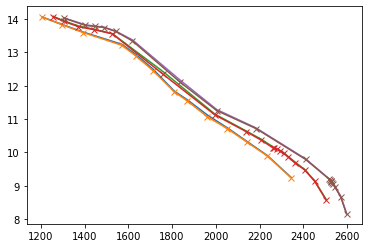

In [2]:
def mags_for_mass(mass, temps, log_gs, filt_spec):
    mags = []
    for idx in range(len(temps)):
        model_spec = BT_SETTL.get(mass=mass, T_eff=temps[idx], log_g=log_gs[idx])
        mags.append(dd.VEGA.magnitude(model_spec, filter_spectrum=filt_spec))
    return np.asarray(mags)

for mass in BT_SETTL_MKO_ISOCHRONES.masses[:3]:
    mask = BT_SETTL_MKO_ISOCHRONES['M_Msun'] == mass.value
    filt_name = 'J'
    plt.plot(BT_SETTL_MKO_ISOCHRONES[mask]['T_eff_K'], BT_SETTL_MKO_ISOCHRONES[mask][filt_name])
    temps = BT_SETTL_MKO_ISOCHRONES[mask]['T_eff_K']
    log_gs = BT_SETTL_MKO_ISOCHRONES[mask]['log_g']
    my_mags = mags_for_mass(mass, temps, log_gs, getattr(dd.MKO, filt_name))
    plt.plot(temps, my_mags, marker='x')

In [3]:
BT_SETTL_MKO_ISOCHRONES.ages.to(u.Myr)

<Quantity [1.0e+00, 2.0e+00, 3.0e+00, 4.0e+00, 5.0e+00, 6.0e+00, 7.0e+00,
           8.0e+00, 9.0e+00, 1.0e+01, 2.0e+01, 3.0e+01, 4.0e+01, 5.0e+01,
           6.0e+01, 7.0e+01, 8.0e+01, 9.0e+01, 1.0e+02, 1.2e+02, 1.5e+02,
           2.0e+02, 3.0e+02, 4.0e+02, 5.0e+02, 6.0e+02, 7.0e+02, 8.0e+02,
           9.0e+02, 1.0e+03, 2.0e+03, 3.0e+03, 4.0e+03, 5.0e+03, 6.0e+03,
           7.0e+03, 8.0e+03, 9.0e+03, 1.0e+04] Myr>

In [4]:
current_age = 200 * u.Myr
sirius_d = 2.64 * u.pc

# Color vs. mass at given age

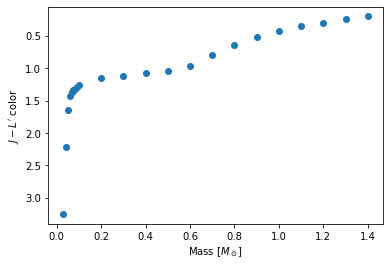

In [5]:
def color_vs_mass():
    ax = plt.gca()
    mask = BT_SETTL_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    j_minus_l_color = BT_SETTL_MKO_ISOCHRONES[mask]['J'] - BT_SETTL_MKO_ISOCHRONES[mask]['Lprime']
    ax.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], j_minus_l_color)
    ax.set(
        ylim=ax.get_ylim()[::-1],
        xlabel='Mass [$M_\\odot$]',
        ylabel='$J - L\'$ color'
    )

color_vs_mass()

If the $J - L'$ color is a positive number, that means that $J$ > $L'$, meaning the object is dimmer in $J$. At low masses, this is more pronounced.

In [6]:
np.log10(dd.deltamag_to_contrast(3))

-1.2

At the lowest masses, the target is $\sim 10 \times$ brighter in $L'$.

# Compare T_eff vs. mass for AMES-Cond to BT-Settl

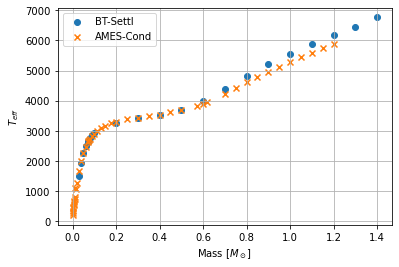

In [7]:
def t_eff_vs_mass(ax):
    mask = BT_SETTL_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    ax.scatter(
        BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'],
        BT_SETTL_MKO_ISOCHRONES[mask]['T_eff_K'],
        label='BT-Settl'
    )
    
    mask2 = AMES_COND_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    ax.scatter(
        AMES_COND_MKO_ISOCHRONES[mask2]['M_Msun'],
        AMES_COND_MKO_ISOCHRONES[mask2]['T_eff_K'],
        label='AMES-Cond',
        marker='x'
    )
    ax.set(
        xlabel='Mass [$M_\\odot$]',
        ylabel='$T_{eff}$',
#         xscale='log',
#         yscale='log'
    )
    ax.grid()
    ax.legend()

t_eff_vs_mass(plt.gca())

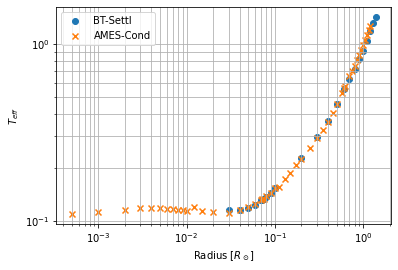

In [8]:
def mass_log_g_to_radius(mass, log_g_cm_per_s2):
    g = 10**log_g_cm_per_s2 * u.cm/u.s**2
    return dd.mass_surface_gravity_to_radius(mass, g)

def t_eff_vs_radius(ax):
    mask = BT_SETTL_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    ax.scatter(
        BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'],
        mass_log_g_to_radius(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'] * u.Msun, BT_SETTL_MKO_ISOCHRONES[mask]['log_g']).to(u.Rsun),
        label='BT-Settl'
    )
    
    mask2 = AMES_COND_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    ax.scatter(
        AMES_COND_MKO_ISOCHRONES[mask2]['M_Msun'],
        mass_log_g_to_radius(AMES_COND_MKO_ISOCHRONES[mask2]['M_Msun'] * u.Msun, AMES_COND_MKO_ISOCHRONES[mask2]['log_g']).to(u.Rsun),
        label='AMES-Cond',
        marker='x'
    )
    ax.set(
        xlabel='Radius [$R_\\odot$]',
        ylabel='$T_{eff}$',
        xscale='log',
        yscale='log'
    )
    ax.grid(which='both')
    ax.legend()

t_eff_vs_radius(plt.gca())

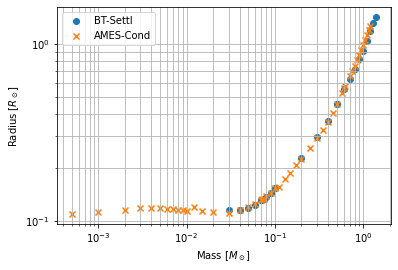

In [9]:
def t_eff_vs_radius(ax):
    mask = BT_SETTL_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    ax.scatter(
        BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'],
        mass_log_g_to_radius(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'] * u.Msun, BT_SETTL_MKO_ISOCHRONES[mask]['log_g']).to(u.Rsun),
        label='BT-Settl'
    )
    
    mask2 = AMES_COND_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    ax.scatter(
        AMES_COND_MKO_ISOCHRONES[mask2]['M_Msun'],
        mass_log_g_to_radius(AMES_COND_MKO_ISOCHRONES[mask2]['M_Msun'] * u.Msun, AMES_COND_MKO_ISOCHRONES[mask2]['log_g']).to(u.Rsun),
        label='AMES-Cond',
        marker='x'
    )
    ax.set(
        ylabel='Radius [$R_\\odot$]',
        xlabel='Mass [$M_\\odot$]',
        xscale='log',
        yscale='log'
    )
    ax.grid(which='both')
    ax.legend()

t_eff_vs_radius(plt.gca())

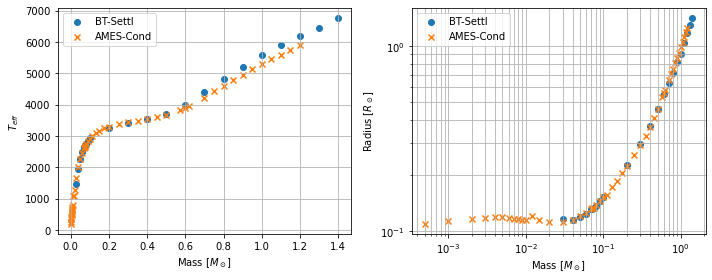

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
t_eff_vs_mass(ax1)
t_eff_vs_radius(ax2)
plt.tight_layout()

# Contrast with _A_ star (Sirius) vs. mass at given age

In [11]:
def synthetic_mag_clio(spec):
    return dd.VEGA.magnitude(spec, filter_spectrum=dd.CLIO_3_9_FILTER)

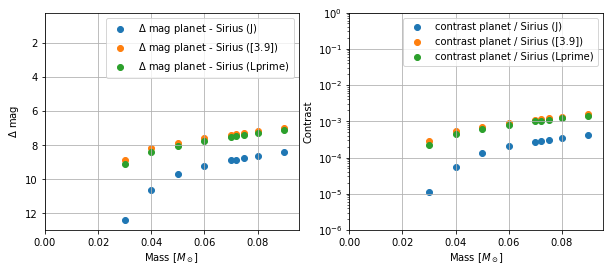

In [12]:
def sirius_contrast_vs_mass(ax1, ax2):
    
    mask = BT_SETTL_MKO_ISOCHRONES['age_Gyr'] == current_age.to(u.Gyr).value
    deltamag_J = BT_SETTL_MKO_ISOCHRONES[mask]['J'] - dd.SiriusFacts.M_J
    ax1.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], deltamag_J, label='$\Delta$ mag planet - Sirius (J)')
    ax2.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], dd.deltamag_to_contrast(deltamag_J), label='contrast planet / Sirius (J)')
    
    # Compare to 3.9 um narrow filter
    sirius_M_3_9 =  dd.absolute_mag(synthetic_mag_clio(dd.SIRIUS), dd.SiriusFacts.d)
    abs_mags_3_9 = []
    for iso in BT_SETTL_MKO_ISOCHRONES[mask]:
        model = BT_SETTL.get(
            mass=iso['M_Msun'] * u.Msun,
            T_eff=iso['T_eff_K'],
            log_g=iso['log_g']
        )
        abs_mag = synthetic_mag_clio(model)
        abs_mags_3_9.append(abs_mag)
    abs_mags_3_9 = np.asarray(abs_mags_3_9)
    deltamag_3_9 = abs_mags_3_9 - sirius_M_3_9
    ax1.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], deltamag_3_9, label='$\Delta$ mag planet - Sirius ([3.9])')
    ax2.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], dd.deltamag_to_contrast(deltamag_3_9), label='contrast planet / Sirius ([3.9])')

    deltamag_Lprime = BT_SETTL_MKO_ISOCHRONES[mask]['Lprime'] - dd.SiriusFacts.M_Lprime
    ax1.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], deltamag_Lprime, label='$\Delta$ mag planet - Sirius (Lprime)')
    ax2.scatter(BT_SETTL_MKO_ISOCHRONES[mask]['M_Msun'], dd.deltamag_to_contrast(deltamag_Lprime), label='contrast planet / Sirius (Lprime)')
    
    ax1.set(
        ylim=ax1.get_ylim()[::-1],
        xlim=[0, (100 * u.Mjup).to(u.Msun)],
        xlabel='Mass [$M_\\odot$]',
        ylabel='$\Delta$ mag',
    )
    ax1.grid()
    ax1.legend()
    ax2.set(
        yscale='log',
        ylim=[1e-6, 1],
        xlim=[0, (100 * u.Mjup).to(u.Msun)],
        ylabel='Contrast',
        xlabel='Mass [$M_\\odot$]',
    )
    ax2.grid()
    ax2.legend()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
sirius_contrast_vs_mass(ax1, ax2)

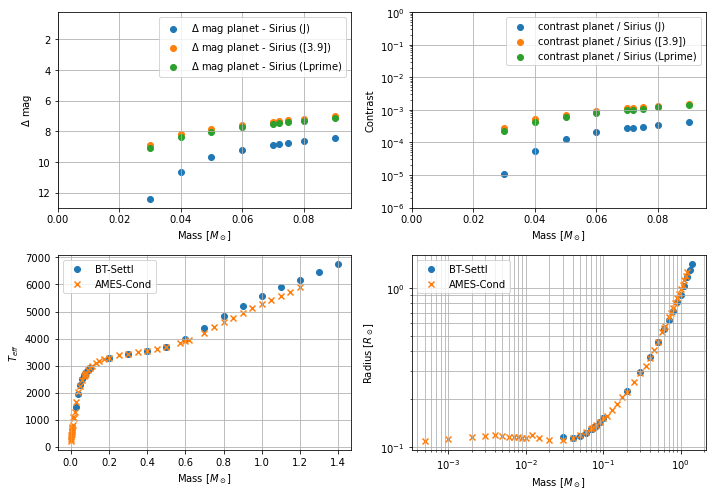

In [13]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))
sirius_contrast_vs_mass(ax1, ax2)
t_eff_vs_mass(ax3)
t_eff_vs_radius(ax4)
plt.tight_layout()